# ETL Project - RamNareshBabu Sake & Robert

# Importing the Libraries and Keys

In [4]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import gmaps.datasets
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData
import psycopg2

from api_keys import *

### Extract Process - Extracting Stock Data using API and loading into DataFrame and also to a CSV

In [5]:
import time
url_stock="https://www.alphavantage.co/query?"
function="function=TIME_SERIES_DAILY"
apikey="&apikey={alpha_vantage_key}"
output="&outputsize=full"
final_df=pd.DataFrame()

companies={'ABBV','AMGN','BIIB','TECH','BMY','GILD','ILMN','MRNA','REGN','VRTX','AMGN','BMY','GILD'}

for company in companies:
    
    print(company)
    symbol="&symbol="+company
    query_url=url_stock+function+symbol+output+apikey
    print(query_url)
    response = requests.get(query_url).json()
    time.sleep(13)
    #pprint(response.json())

    results_dict=response["Time Series (Daily)"]
    results_df=pd.DataFrame(results_dict)
    results_df_tram=results_df.transpose()
    results_df_tram["Company"]=company
    results_df_tram
    final_df
    frames = [final_df, results_df_tram]
    final_df = pd.concat(frames)
                    #final_df = pd.concat([final_df,ibm_df_tram], axis=1)
final_df

GILD
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GILD&outputsize=full&apikey={alpha_vantage_key}
TECH
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TECH&outputsize=full&apikey={alpha_vantage_key}
BMY
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=BMY&outputsize=full&apikey={alpha_vantage_key}
BIIB
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=BIIB&outputsize=full&apikey={alpha_vantage_key}
REGN
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=REGN&outputsize=full&apikey={alpha_vantage_key}
MRNA
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MRNA&outputsize=full&apikey={alpha_vantage_key}
ABBV
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ABBV&outputsize=full&apikey={alpha_vantage_key}
AMGN
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMGN&outputsize=full&apikey={alpha_vantage_key}
ILMN
https://www.alphavantage.co/q

,1. open,2. high,3. low,4. close,5. volume,Company
2020-05-26,73.9800,74.3000,72.4100,73.1800,12190609,GILD
2020-05-22,73.0900,73.4900,72.7116,73.3400,6268461,GILD
2020-05-21,73.4693,73.9300,72.8900,73.5000,7168558,GILD
2020-05-20,72.8100,74.0900,72.7100,73.8900,13429450,GILD
2020-05-19,73.6735,74.8500,72.3000,72.3400,14152025,GILD
...,...,...,...,...,...,...
2000-06-01,74.5000,79.6300,74.1300,78.0000,653100,VRTX
2000-05-31,68.9400,73.7500,68.5000,70.8800,627400,VRTX
2000-05-30,64.0000,71.9400,64.0000,70.0000,584300,VRTX
2000-05-26,62.8800,65.0000,62.6300,64.2500,240000,VRTX


### Renaming the columns for the Stock Data

In [6]:
final_stock_df = final_df.reset_index()
final_stock_df.to_csv('Stocks_20years_ETL.csv',index=False)
# Rename the column headers
final_stock_df = final_stock_df.rename(columns={"index": "stock_date",
                                                "1. open": "stock_open_price",
                                                "2. high": "stock_high_price",
                                                "3. low": "stock_low_price",
                                                "4. close": "stock_close_price",
                                                "5. volume": "stock_volume",
                                                "Company": "stock_symbol"})
final_stock_df



,stock_date,stock_open_price,stock_high_price,stock_low_price,stock_close_price,stock_volume,stock_symbol
0,2020-05-26,73.9800,74.3000,72.4100,73.1800,12190609,GILD
1,2020-05-22,73.0900,73.4900,72.7116,73.3400,6268461,GILD
2,2020-05-21,73.4693,73.9300,72.8900,73.5000,7168558,GILD
3,2020-05-20,72.8100,74.0900,72.7100,73.8900,13429450,GILD
4,2020-05-19,73.6735,74.8500,72.3000,72.3400,14152025,GILD
...,...,...,...,...,...,...,...
42429,2000-06-01,74.5000,79.6300,74.1300,78.0000,653100,VRTX
42430,2000-05-31,68.9400,73.7500,68.5000,70.8800,627400,VRTX
42431,2000-05-30,64.0000,71.9400,64.0000,70.0000,584300,VRTX
42432,2000-05-26,62.8800,65.0000,62.6300,64.2500,240000,VRTX


### Defining the column types for Stock Data before loading into PostGres Database

In [7]:
dtype_dict = {"stock_date": sqlalchemy.DateTime(), "stock_open_price": sqlalchemy.types.Float(precision=5, asdecimal=True), "stock_high_price": sqlalchemy.types.Float(precision=5, asdecimal=True),"stock_low_price": sqlalchemy.types.Float(precision=5, asdecimal=True), "stock_close_price": sqlalchemy.types.Float(precision=5, asdecimal=True), "stock_volume": sqlalchemy.types.Integer(), "stock_symbol": sqlalchemy.types.VARCHAR(length=10)}

### Display the Dataframe before loading into Postgres Database

In [8]:
#final_reset_df.set_index(['stock_date','stock_symbol'])
final_stock_df

,stock_date,stock_open_price,stock_high_price,stock_low_price,stock_close_price,stock_volume,stock_symbol
0,2020-05-26,73.9800,74.3000,72.4100,73.1800,12190609,GILD
1,2020-05-22,73.0900,73.4900,72.7116,73.3400,6268461,GILD
2,2020-05-21,73.4693,73.9300,72.8900,73.5000,7168558,GILD
3,2020-05-20,72.8100,74.0900,72.7100,73.8900,13429450,GILD
4,2020-05-19,73.6735,74.8500,72.3000,72.3400,14152025,GILD
...,...,...,...,...,...,...,...
42429,2000-06-01,74.5000,79.6300,74.1300,78.0000,653100,VRTX
42430,2000-05-31,68.9400,73.7500,68.5000,70.8800,627400,VRTX
42431,2000-05-30,64.0000,71.9400,64.0000,70.0000,584300,VRTX
42432,2000-05-26,62.8800,65.0000,62.6300,64.2500,240000,VRTX


### Create a dictionary with Biotech company Names and Symbols

In [9]:
Biotech_Dict={ "ABBV":"AbbVie Inc.",
               "AMGN":"Amgen Inc",
               "BIIB": "BioGen Inc",
               "TECH": "Bio-Techne Corp",
               "BMY" : "Bristol-Myers Squibb Company",
               "GILD": "Gilead Sciences Inc",
               "ILMN": "Illumina Inc",
               "MRNA": "Moderna Inc",
               "REGN": "Regeneron Pharmaceuticals Inc",
               "VRTX": "Vertex Pharmaceuticals Inc"
             }

### Create a Biotech Names & Symbols Dataframe

In [10]:
biotech_df = ["License Serial Number", "Premises Name", "County ID Code"]

Biotech_items = Biotech_Dict.items()
Biotech_list = list(Biotech_items)

biotech_df = pd.DataFrame(Biotech_list)
biotech_df.columns=["stock_symbol","stock_name"]
biotech_df.set_index('stock_symbol')

,stock_name
stock_symbol,
ABBV,AbbVie Inc.
AMGN,Amgen Inc
BIIB,BioGen Inc
TECH,Bio-Techne Corp
BMY,Bristol-Myers Squibb Company
GILD,Gilead Sciences Inc
ILMN,Illumina Inc
MRNA,Moderna Inc
REGN,Regeneron Pharmaceuticals Inc


### Create a database named "etl_stock_db" in PGADMIN manually - Not in Jupiter Notebook
       
     Steps:
     1. Open PGAdmin4 from start Menu
     2. Login to PostGresSQL11 using a password if any. Most of the times the default password is postgres.
     3. Once logged in, right click on Databases and click on create > Database
     4. Enter the database name "etl_stock_db" and click ok.


### Load Process - Connect to Postgres and load the stock dataframes in to tables

In [11]:

from config import pwd
connection_string = f'postgres:{pwd}@localhost:5432/etl_stock_db'
engine = create_engine(f'postgresql://{connection_string}')

In [12]:
# Check tables
engine.table_names()

[]

#### Load Stock Data

In [13]:
final_stock_df.to_sql(name='stock_detail', con=engine, if_exists='replace', index=False, dtype=dtype_dict)

#### Load Stock Names

In [14]:
biotech_df.to_sql(name='stock_names', con=engine, if_exists='replace', index=True)

In [15]:
# Confirm tables
engine.table_names()

['stock_detail', 'stock_names']

In [16]:
connection = engine.connect()

### Transform - Read the data from Postgres and Aggregate the Yearly Stock prices and load into Dataframe

In [17]:
# We can view all of the classes that automap found
# Query All Records for salaries in the the Database
#avg_stock_data_df = pd.read_sql("SELECT stock_symbol,AVG(stock_close_price) avg_stock_open_price FROM stock_detail group by stock_symbol  ", connection)
avg_stock_data_df = pd.read_sql("SELECT SN.stock_name,SD.stock_symbol,EXTRACT(YEAR FROM SD.stock_date) as stock_year,AVG(SD.stock_close_price) avg_stock_close_price, AVG(SD.stock_volume) avg_volume  FROM stock_detail SD,stock_names SN where SD.stock_symbol=SN.stock_symbol group by SN.stock_name,SD.stock_symbol,EXTRACT(YEAR FROM SD.stock_date) order by SN.stock_name,SD.stock_symbol,stock_year", connection)
avg_stock_data_df.head(50)

,stock_name,stock_symbol,stock_year,avg_stock_close_price,avg_volume
0,AbbVie Inc.,ABBV,2013.0,43.662265,6.259332e+06
1,AbbVie Inc.,ABBV,2014.0,55.460079,9.132808e+06
2,AbbVie Inc.,ABBV,2015.0,62.104246,1.048541e+07
3,AbbVie Inc.,ABBV,2016.0,60.668056,8.017717e+06
4,AbbVie Inc.,ABBV,2017.0,75.167769,5.917053e+06
5,AbbVie Inc.,ABBV,2018.0,97.473745,7.049850e+06
6,AbbVie Inc.,ABBV,2019.0,77.948849,7.848039e+06
7,AbbVie Inc.,ABBV,2020.0,84.679800,1.206311e+07
8,Amgen Inc,AMGN,2000.0,67.542039,7.324006e+06
9,Amgen Inc,AMGN,2001.0,62.314435,9.833842e+06


#### Using matplot to check the yearly stock price variation for the biotech firms

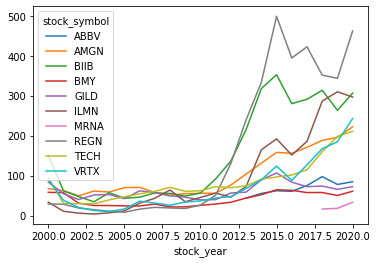

In [18]:
# Save references to each table
df = avg_stock_data_df.pivot(index='stock_year', columns='stock_symbol', values='avg_stock_close_price')

df.plot()

### Load - Load the Yearly Stock Summary  from the dataframe back to the database

In [19]:
yss_dtype={"stock_name": sqlalchemy.types.VARCHAR(length=30), "stock_symbol": sqlalchemy.types.VARCHAR(length=10), "stock_year": sqlalchemy.types.Integer(), "avg_stock_close_price": sqlalchemy.types.Float(precision=5, asdecimal=True),"avg_stock_volume": sqlalchemy.types.Integer()}
avg_stock_data_df.to_sql(name='yearly_stock_summary', con=engine, if_exists='replace', index=False, dtype=yss_dtype)

In [20]:
# Confirm tables
engine.table_names()

['stock_detail', 'stock_names', 'yearly_stock_summary']

### Read the final Summarized yearly stock data loaded into the database

In [21]:
pd.read_sql("select * From yearly_stock_summary",connection)

,stock_name,stock_symbol,stock_year,avg_stock_close_price,avg_volume
0,AbbVie Inc.,ABBV,2013,43.6623,6.259332e+06
1,AbbVie Inc.,ABBV,2014,55.4601,9.132808e+06
2,AbbVie Inc.,ABBV,2015,62.1042,1.048541e+07
3,AbbVie Inc.,ABBV,2016,60.6681,8.017717e+06
4,AbbVie Inc.,ABBV,2017,75.1678,5.917053e+06
...,...,...,...,...,...
174,Vertex Pharmaceuticals Inc,VRTX,2016,88.1828,1.976507e+06
175,Vertex Pharmaceuticals Inc,VRTX,2017,126.9040,1.675913e+06
176,Vertex Pharmaceuticals Inc,VRTX,2018,167.4050,1.512119e+06
177,Vertex Pharmaceuticals Inc,VRTX,2019,184.7420,1.289119e+06
